In [64]:
pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\maria gichomo\anaconda3\lib\site-packages (0.11.2)




[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns   
import string
import nltk
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [68]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [69]:
tweet =pd.read_csv("tweets.csv")

In [75]:
tweet

,Tweet,Intention
0,Ligi ya Championship: Msimamo wa jedwali.\n#KapuLaMichezo #KiswahiliNiChetu #MkallaSports #RugerInMeru #Mpesa #SkyBetChampionship #EFL @SkyBetChamp\n Dj Grauchi President Uhuru Kenyatta Femi One M...,1
1,Inconvenience for the One Who Guaranteed Eve Mungai Unloaded Him After She Became Fruitful as It Arises That He is a Phony Gsu Official - He Has Been Confined at Kilimani Police\nFemi One Ndindi N...,1
2,Ligi ya DStv Premiership: Matokeo ya mechi.\n#KapuLaMichezo #KiswahiliNiChetu #MkallaSports #RugerInMeru #DstvPrem @OfficialPSL @TSGALAXYFC @Moroka_Swallows\n@orlandopirates @RichardsBayFC_\nDj Gr...,1
3,Here Are the Names of the Previous US President and a Very Rich Person Who Manipulated Raila Odinga in the Last Political Decision - It Was Not Chebukati or Ruto\n#RugerInMeru Ndindi Nyoro preside...,0
4,"@TiborPNagyJr Uhuru Kenyatta is probably not paid yet by @TiborPNagyJr and company @AbiyAhmedAli, @EsayasAfeworki",0
...,...,...
4568,"P R O M O !\n\nInitial Prices: 3,500 - 4000\nPromo price: 3000 each.\nContact: 08144196485.\nLocation: Kaduna.\nNationwide delivery.\n\nAll soles are foreign.\nDm for wholesale.\n\nKINDLY RETWEET ...",1
4569,10T Toilet Paper Making Line Turnkey Project\n#ToiletPaperMachine\n\nWelcome contact us for the price and details.\nEmail: leizhanpapermachine@gmail.com\nWhatsAPP: +86 18539133178\nhttps://t.co/LM...,1
4570,Protonitazene CAS119276-01-6 powder\nGOOD EFFECT!!!\nContact me for a better price\nWickr: jinixu\nWhatsapp/Telegram/Skype: +86 15632370733\nE-mail：sales05@hebeichem.cn https://t.co/VveIHaRDCv,1
4571,New deal alert 🚨 \nRegistered Toyota Camry \nBrand: Toyota \nModel:Camry \nYear:2004\nTransmission: Automatic \nCondition: Nigerian used \nLocation: Ajah \nPrice:1.6M\nContact:07081757879\nWhatsAp...,1


In [76]:
tweet.shape

(4573, 2)

In [111]:
# printing random tweets 
print(tweet['Tweet'].iloc[0],"\n")
print(tweet['Tweet'].iloc[1],"\n")
print(tweet['Tweet'].iloc[2],"\n")
print(tweet['Tweet'].iloc[3],"\n")
print(tweet['Tweet'].iloc[4],"\n")

ligi ya championship msimamo wa jedwali kapulamichezo kiswahilinichetu mkallasports rugerinmeru mpesa skybetchampionship efl skybetchamp dj grauchi president uhuru kenyatta femi one mayele 

inconvenience one guaranteed eve mungai unloaded became fruitful arises phony gsu official confined kilimani police femi one ndindi nyoro president uhuru kenyatta baba 6th rest peace 

ligi ya dstv premiership matokeo ya mechi kapulamichezo kiswahilinichetu mkallasports rugerinmeru dstvprem officialpsl tsgalaxyfc moroka_swallows orlandopirates richardsbayfc_ dj grauchi president uhuru kenyatta crimes via alphasaraplagat 

names previous us president rich person manipulated raila odinga last political decision chebukati ruto rugerinmeru ndindi nyoro president uhuru kenyatta femi one 

tiborpnagyjr uhuru kenyatta probably paid yet tiborpnagyjr company abiyahmedali esayasafeworki 



In [112]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [113]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
tweet.Tweet = tweet['Tweet'].apply(data_processing)

In [115]:
tweet= tweet.drop_duplicates('Tweet')

In [116]:
tweet.duplicated().any()

False

In [117]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [118]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [119]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [120]:
tweet['Tweet'] = tweet['Tweet'].apply(lambda x: lemmatizing(x))

In [121]:
# printing the data to see the effect of preprocessing
print(tweet['Tweet'].iloc[0],"\n")
print(tweet['Tweet'].iloc[1],"\n")
print(tweet['Tweet'].iloc[2],"\n")
print(tweet['Tweet'].iloc[3],"\n")
print(tweet['Tweet'].iloc[4],"\n")

ligi ya championship msimamo wa jedwali kapulamichezo kiswahilinichetu mkallasports rugerinmeru mpesa skybetchampionship efl skybetchamp dj grauchi president uhuru kenyatta femi one mayele 

inconvenience one guaranteed eve mungai unloaded became fruitful arises phony gsu official confined kilimani police femi one ndindi nyoro president uhuru kenyatta baba 6th rest peace 

ligi ya dstv premiership matokeo ya mechi kapulamichezo kiswahilinichetu mkallasports rugerinmeru dstvprem officialpsl tsgalaxyfc moroka_swallows orlandopirates richardsbayfc_ dj grauchi president uhuru kenyatta crimes via alphasaraplagat 

names previous us president rich person manipulated raila odinga last political decision chebukati ruto rugerinmeru ndindi nyoro president uhuru kenyatta femi one 

tiborpnagyjr uhuru kenyatta probably paid yet tiborpnagyjr company abiyahmedali esayasafeworki 



In [122]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      3990 non-null   object
 1   Intention  3990 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.5+ KB


In [123]:
tweet['Intention'].value_counts()

0    2024
1    1966
Name: Intention, dtype: int64

In [124]:
Non_ads = tweet[tweet.Intention == 0]
Non_ads.head()

,Tweet,Intention
3,names previous us president rich person manipulated raila odinga last political decision chebukati ruto rugerinmeru ndindi nyoro president uhuru kenyatta femi one,0
4,tiborpnagyjr uhuru kenyatta probably paid yet tiborpnagyjr company abiyahmedali esayasafeworki,0
5,kenyas former president uhuru kenyatta key player african unionled efforts bring peace ethiopia said friday would skipping negotiations expected begin weekend raising doubts whether talks would go...,0
6,caxstonepkigata think hon mungatana wash wash business come government official con 76m like close uhuru kenyatta time anyway pole sana,0
8,au talks expected mediated troika negotiators including blocs hoa oolusegun_obj former kenyan president uhuru kenyatta kenyatta announced participate tigrayunderattack antonioguterres gk,0


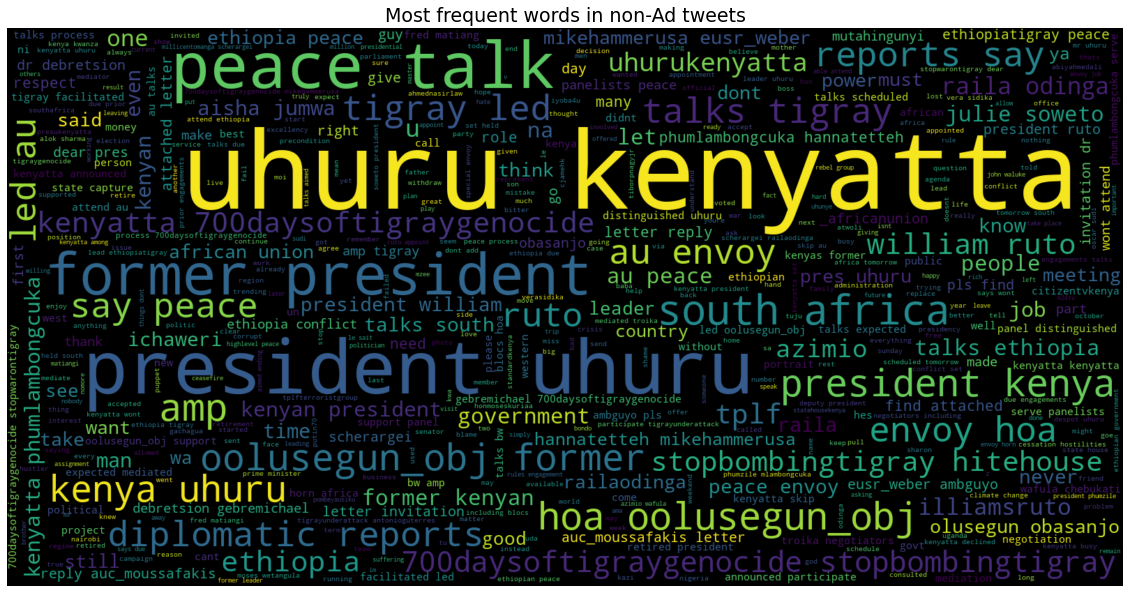

In [125]:
text = ' '.join([word for word in Non_ads['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non-Ad tweets', fontsize = 19)
plt.show()

In [127]:
Ads = tweet[tweet.Intention == 1]
Ads.head()

,Tweet,Intention
0,ligi ya championship msimamo wa jedwali kapulamichezo kiswahilinichetu mkallasports rugerinmeru mpesa skybetchampionship efl skybetchamp dj grauchi president uhuru kenyatta femi one mayele,1
1,inconvenience one guaranteed eve mungai unloaded became fruitful arises phony gsu official confined kilimani police femi one ndindi nyoro president uhuru kenyatta baba 6th rest peace,1
2,ligi ya dstv premiership matokeo ya mechi kapulamichezo kiswahilinichetu mkallasports rugerinmeru dstvprem officialpsl tsgalaxyfc moroka_swallows orlandopirates richardsbayfc_ dj grauchi president...,1
7,wife children left extahidi high entertainer omosh weeps help uncovers engaging misery winnie odinga femi one president uhuru kenyatta rest peace dj grauchi,1
9,unlock mkopa phones use samsung nokia without paying president uhuru kenyatta femi one winnie odinga rest peace tuju,1


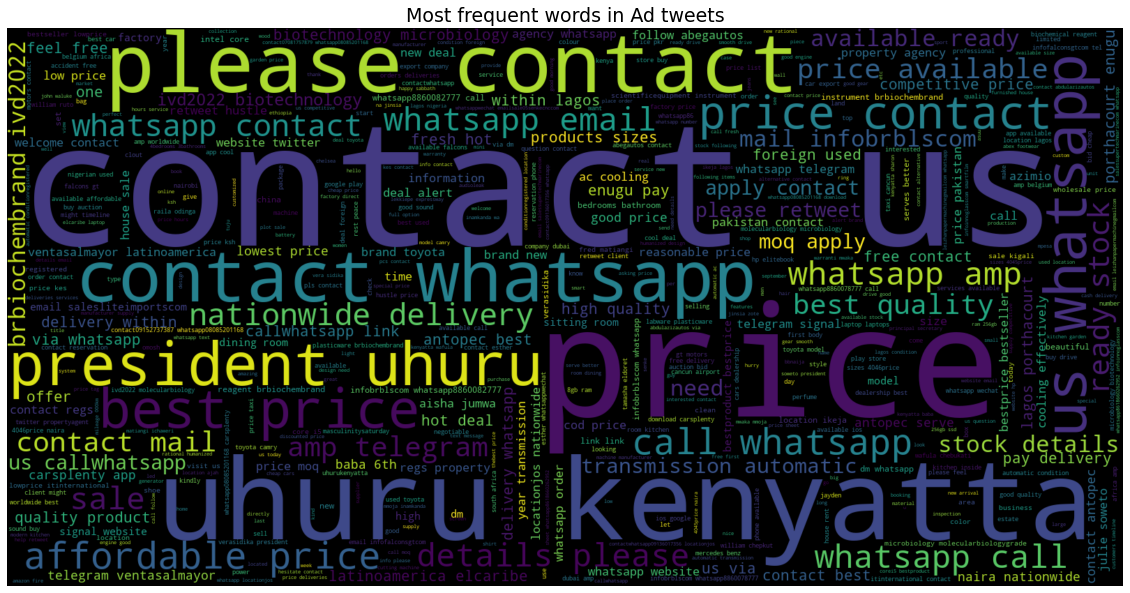

In [128]:
text = ' '.join([word for word in Ads['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Ad tweets', fontsize = 19)
plt.show()

In [138]:
pip install gensim


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [140]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(tweet['Tweet']) # tokenize and build vocabulary
bow.shape

(3990, 1000)

In [143]:
tweet=tweet.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, tweet['Intention'],
                                                    test_size=0.2, random_state=69)


In [144]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (3192, 1000)
X_test_shape :  (798, 1000)
y_train_shape :  (3192,)
y_test_shape :  (798,)


In [145]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

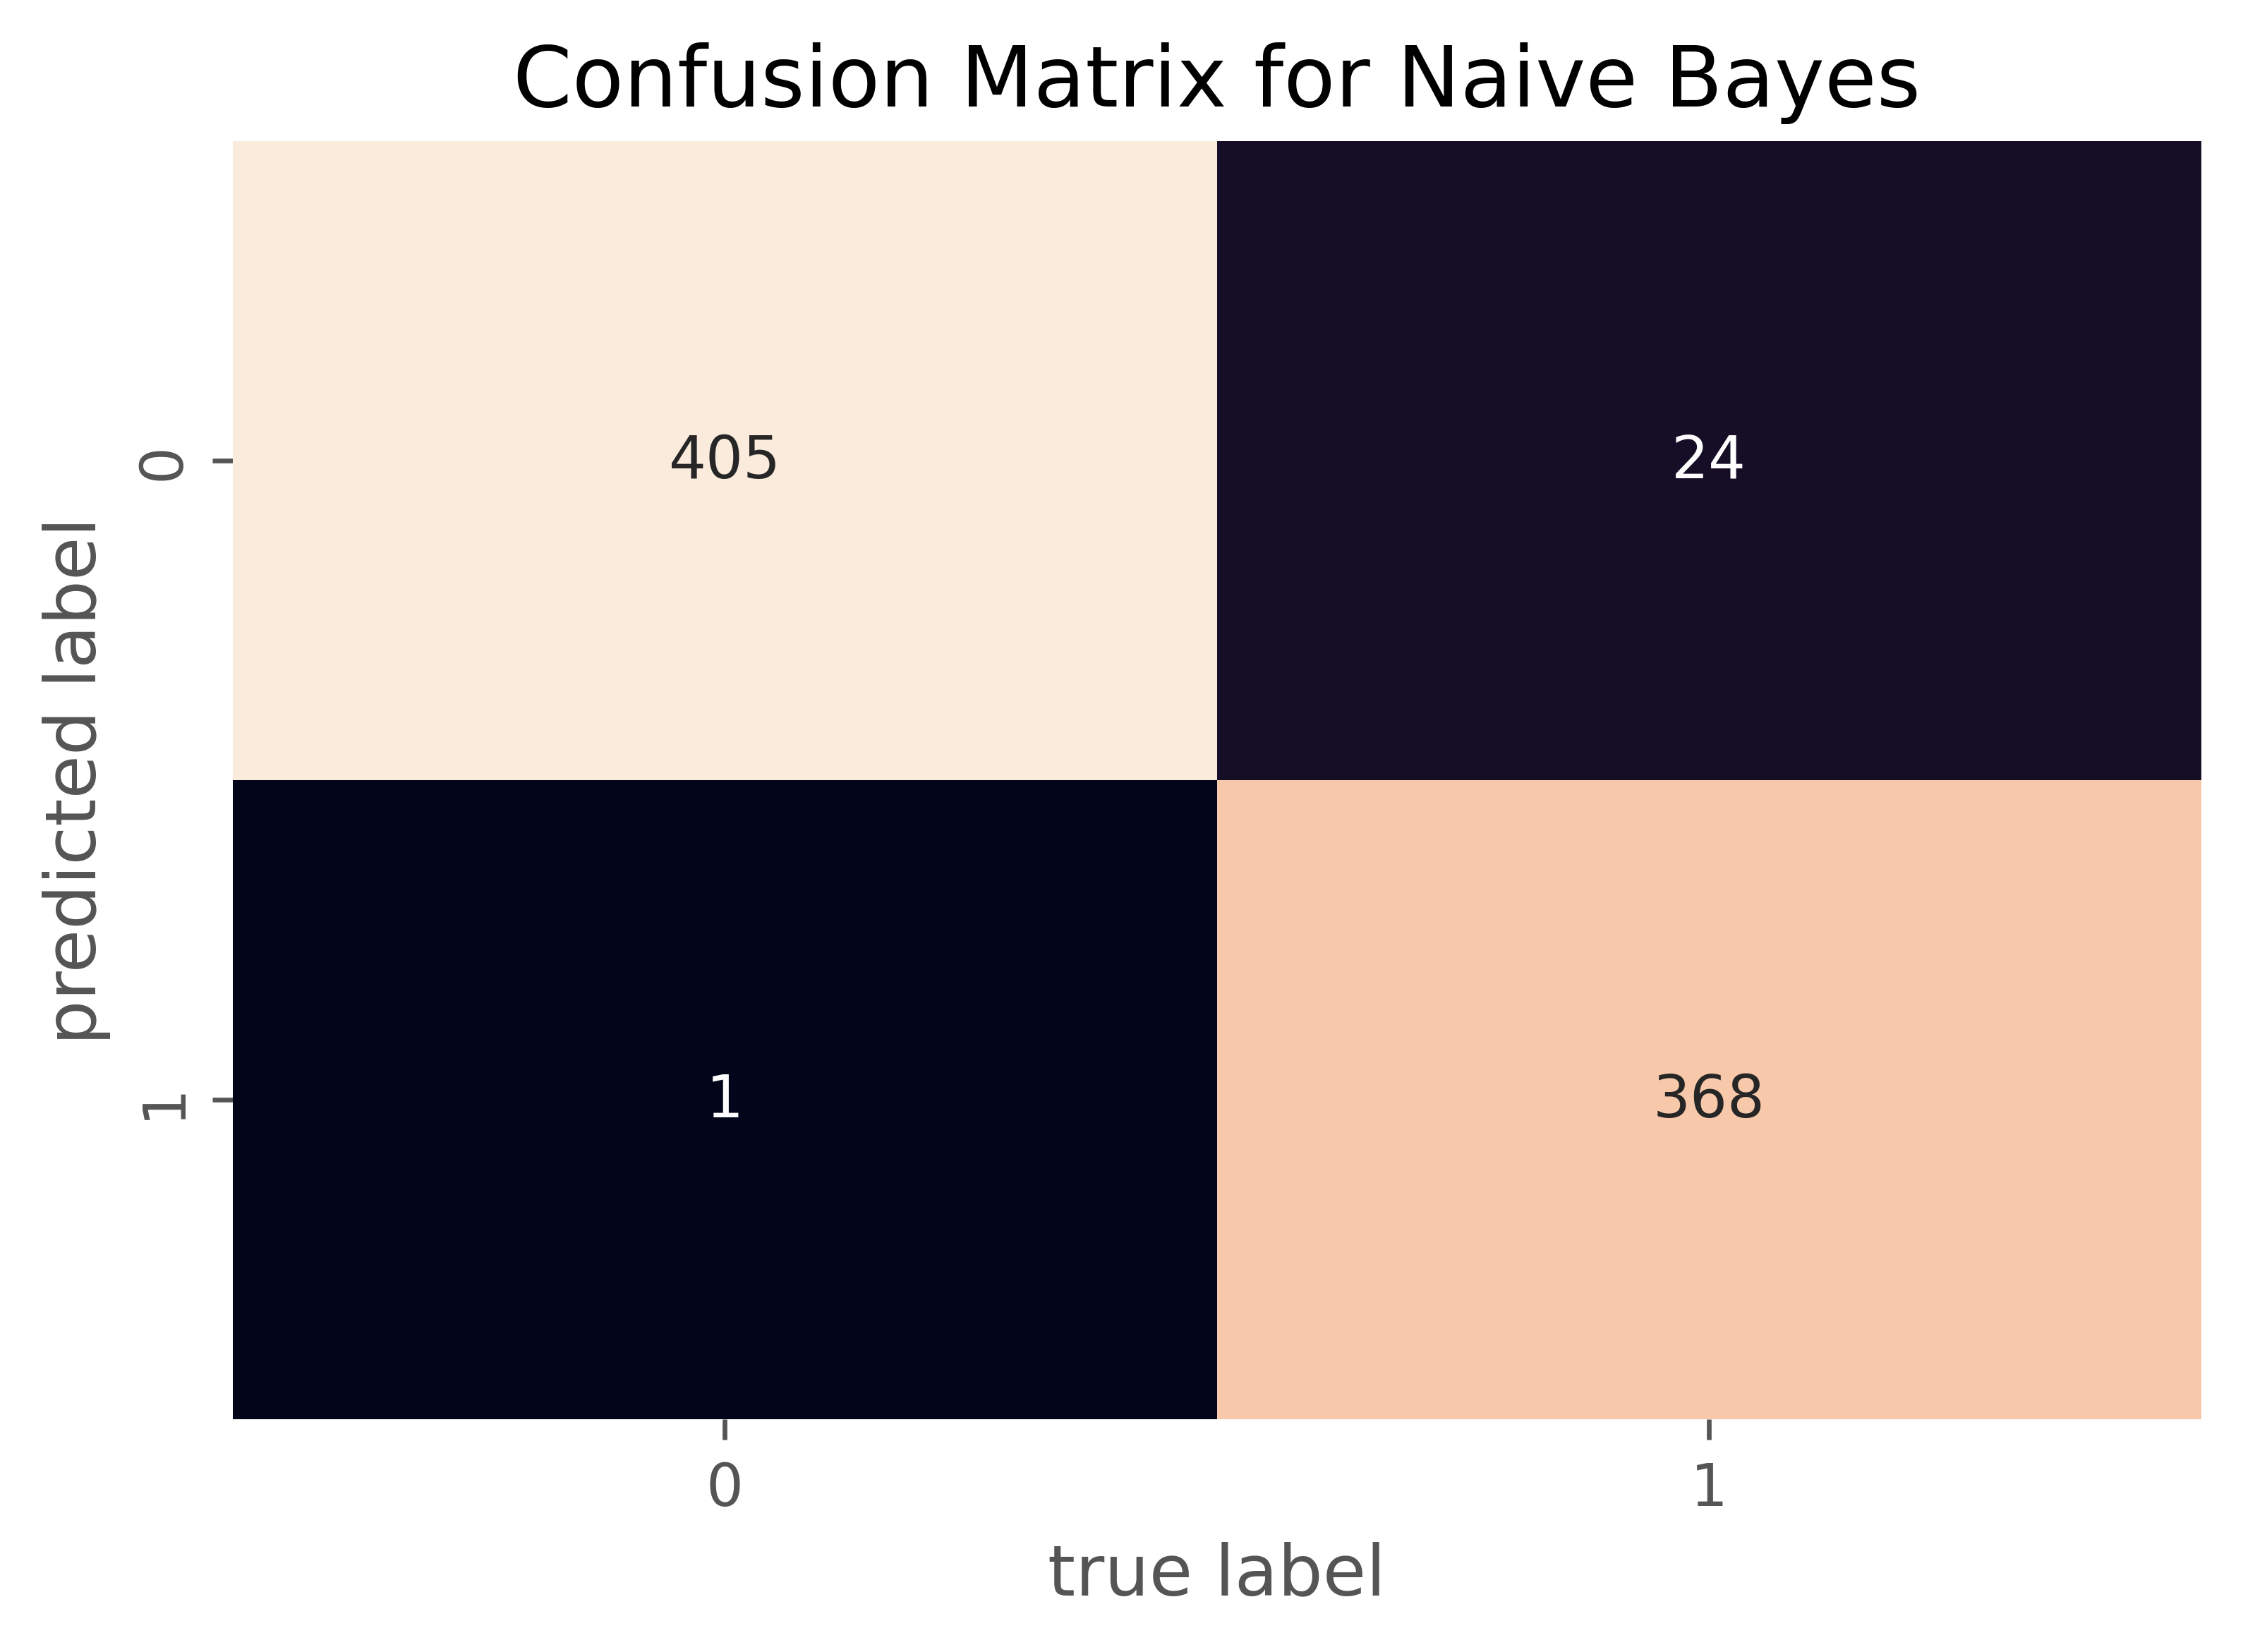

In [146]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [147]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.968671679197995


In [148]:
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       406
           1       1.00      0.94      0.97       392

    accuracy                           0.97       798
   macro avg       0.97      0.97      0.97       798
weighted avg       0.97      0.97      0.97       798

